<img src="https://datascientest.fr/train/assets/logo_datascientest.png" style="height:150px">

<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>Projet Data Science</h1></center>
<center><h2>Création de jeux de données - Transactions</h2></center>
<hr style="border-width:2px;border-color:#75DFC1">

<blockquote>
Dans cette partie, nous allons créer certains jeux de données que nous utiliserons plus tard pour faire des analyses sur le contenu des données. Cette étape est cruciale car persister des jeux de données intermédiaires, plutôt que de faire toutes les étapes d'un seul coup, nous permet aussi de répartir le travail par la suite. <br>
    Dans un premier temps, nous allons réaliser un jeu de données contenant les informations sur les différentes transactions réalisées. Si on a pu voir que certaines lignes correspondaient effectivement à des transactions, il est intéressant de se demander ce que doit signifier une transaction. Pour nous une transaction est censée être une interaction du visiteur avec le site internet. C'est pour celà que nous devons faire attention aux données que nous avons et ne pas considérer chaque ligne de transaction séparemment, puisqu'en réalité, si il achète plusieurs produits, l'utilisateur ne fait pas nécessairement plusieurs actions.<br>
    <div class="alert-info">Il peut être intéressant de réaliser certaines des opérations sur des portions du jeu de données (argument <code>nrows</code> de la fonction <code>pd.read_csv</code>). Cette technique permet d'expérimenter plus vite les fonctions et donc d'itérer plus vite vers une meilleure solution. On peut aussi générer des données aléatoires de taille plus faible que les données réelles. Toutefois, il ne faut pas oublier de repasser sur le jeu de données complet après.</div>

</blockquote>

* importer <code>pandas</code> et <code>numpy</code> et charger le jeu de données <code>events.csv</code>
* créer une colonne <code>event_id</code> qui contient l'index

In [57]:
# Insérer le code ici


In [2]:
# Insérer le code ici

import pandas as pd 
import numpy as np

df = pd.read_csv('events.csv', 
                 # nrows=1000
                )

df['event_id'] = df.index
df.head()

,timestamp,visitorid,event,itemid,transactionid,event_id
0,1433221332117,257597,view,355908,NaN,0
1,1433224214164,992329,view,248676,NaN,1
2,1433221999827,111016,view,318965,NaN,2
3,1433221955914,483717,view,253185,NaN,3
4,1433221337106,951259,view,367447,NaN,4


<blockquote>
    On va sauvegarder cet index en utilisant la méthode <code>to_csv</code>
</blockquote>

* sauvegarder ce jeu de données dans le fichier <code>events_index.csv</code>

In [22]:
# Insérer le code ici


In [3]:
# Insérer le code ici

df.to_csv('events_index.csv', index=False)

<blockquote>
    Dans un premier temps, nous devons nous régler le problème des transactions de manière à ne laisser qu'un événement pour un <code>transactionid</code>. Nous ne devons pas pour autant perdre l'information sur les produits et sur le nombre de produits que la transaction comportent.
</blockquote>

* créer un dataframe nommé <code>df_transactions</code> qui contient toutes les données pour lesquelles la colonne <code>transactionid</code> n'est pas nulle.

In [59]:
# Insérer le code ici

In [60]:
# Insérer le code ici

df_transactions = df[df['transactionid'].notna()]
df_transactions.head()

,timestamp,visitorid,event,itemid,transactionid,event_id
130,1433222276276,599528,transaction,356475,4000.0,130
304,1433193500981,121688,transaction,15335,11117.0,304
418,1433193915008,552148,transaction,81345,5444.0,418
814,1433176736375,102019,transaction,150318,13556.0,814
843,1433174518180,189384,transaction,310791,7244.0,843


<blockquote>
    Nous allons aggréger les données selon le <code>transactionid</code>. <br>
    Pour appliquer différentes fonctions d'aggrégations aux différentes colonnes, on utilise un dictionnaire: les clefs sont les colonnes de notre <code>DataFrame</code> et les valeurs les fonctions utilisées: 
    
    

```python 
{
    'col1': sum,
    'col2': my_function,
    'col3': lambda x: some_function(x),
    'col4': [my_first_function, my_second_function], 
    'col5': 'mean', 
}
```
    
<br>
<br>


Dans le cas présent, nous allons prendre les fonctions suivantes pour les différents éléments: 
* <code>timestamp</code>: minimum et maximum
* <code>visitorid</code>: minimum et maximum
* <code>event</code>: nous ne gardons pas cette valeur: elle vaut <code>transaction</code> pour tout le monde comme nous l'avons vu dans la partie précédente.
* <code>itemid</code>: nous voulons obtenir une liste des produits achetés
* <code>event_id</code>: nous voulons obtenir une liste des id des événements    
    
</blockquote>

* construire un dictionnaire <code>aggregation</code> qui contient ces opérations. 


In [61]:
# Insérer le code ici

In [62]:
# Insérer le code ici

aggregation = {
    'timestamp': [min, max],
    'visitorid': [min, max],
    'itemid': list,
    'event_id': list
}

* appliquer l'aggrégation à la maille transaction en écrasant le jeu de données <code>df_transactions</code>

In [63]:
# Insérer le code ici

In [64]:
# Insérer le code ici

df_transactions = df_transactions.groupby(['transactionid']).agg(aggregation)
df_transactions.head()

timestamp                visitorid             itemid  \
                         min            max       min      max      list   
transactionid                                                              
0.0            1434404197081  1434404197081     90352    90352  [425758]   
1.0            1436898608851  1436898608851   1150086  1150086  [454430]   
2.0            1433354549857  1433354549857    556967   556967  [151855]   
3.0            1434931961626  1434931961626    424452   424452   [85842]   
4.0            1433716824966  1433716824966    531661   531661  [224184]   

                event_id  
                    list  
transactionid             
0.0             [271793]  
1.0            [2345030]  
2.0              [56244]  
3.0             [422271]  
4.0             [137132]

<blockquote>
    Prendre le minimum et le maximum de la colonne <code>visitorid</code>, nous permet de vérifier qu'un <code>transactionid</code> correspond bien à un et un seul visiteur.
</blockquote>

* renommer les colonnes <code>['ts_min', 'ts_max', 'visitor_min', 'visitor_max', 'item_list', 'event_list']</code> 
* vérifier qu'il y a bien un visiteur et un seul par <code>transactionid</code>

In [65]:
# Insérer le code ici

In [66]:
# Insérer le code ici

df_transactions.columns = ['ts_min', 'ts_max', 'visitor_min', 'visitor_max', 'item_list', 'event_list']

# pour vérifier que les visiteurs sont bien uniques par transactionid, nous allons faire la différence entre le minimum et le maximum du visitorid
print((df_transactions['visitor_min']-df_transactions['visitor_max']).unique())

[0]


<blockquote>
On a donc bien (heureusement) un et un seul <code>visitorid</code> par <code>transactionid</code>. 
</blockquote>

* supprimer la colonne <code>visitor_max</code> et renommer la colonne <code>visitor_min</code> en <code>visitorid</code>

In [67]:
# Insérer le code ici

In [68]:
# Insérer le code ici

df_transactions = df_transactions.drop(['visitor_max'], axis=1)
df_transactions = df_transactions.rename({'visitor_min': 'visitorid'})

<blockquote>
    Maintenant nous allons vérifier que ce que nous avions vu concernant la différence des timestamps pour un <code>transactionid</code> est bien faible.
</blockquote>

* créer une colonne <code>timestamp_diff</code> qui est la différence entre les colonnes <code>ts_min</code> et <code>ts_max</code>. 
* afficher la distribution de la colonne <code>timestamp_diff</code>

In [69]:
# Insérer le code ici

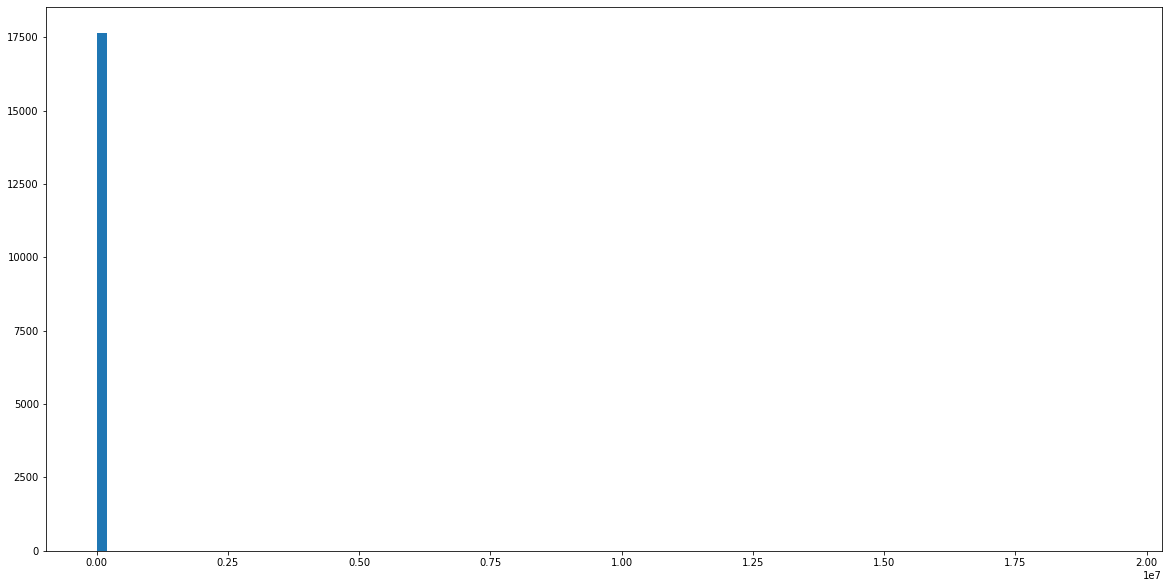

In [70]:
# Insérer le code ici

df_transactions['timestamp_diff'] = df_transactions['ts_max'] - df_transactions['ts_min']

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))


ax.hist(df_transactions['timestamp_diff'], bins=100)

plt.show()


<blockquote>
    Il semblerait que notre hypothèse était fause: certaines transactions semblent s'étendre sur des périodes bien plus longues que prévues... Nous devons étudier cette distribution plus en détail avant d'aller plus loin.
</blockquote>

* utiliser la méthode describe sur la colonne <code>timestamp_diff</code> uniquement sur les transactions qui ont plus d'un produit

In [71]:
# Insérer le code ici

In [72]:
# Insérer le code ici

df_transactions['timestamp_diff'][df_transactions['item_list'].apply(len) > 1].describe(percentiles=[i/10. for i in range(1, 10)])

count    2.710000e+03
mean     2.978384e+04
std      5.884029e+05
min      0.000000e+00
10%      0.000000e+00
20%      0.000000e+00
30%      0.000000e+00
40%      1.500000e+01
50%      1.600000e+01
60%      3.200000e+01
70%      6.200000e+01
80%      9.300000e+01
90%      1.750000e+02
max      1.932197e+07
Name: timestamp_diff, dtype: float64

<blockquote>
    A priori, ces données aberrantes concernent très peu de transactions. 
    Nous allons estimer que si la différence est de moins de plus de 10 secondes alors il n'y a pas d'erreur et c'est bien une seule et même transaction.
</blockquote>

* créer un jeu de données <code>df_transactions_strange</code> qui contient les transactions qui dépassent cette limite (attention les timestamps sont en ms)
* afficher la taille de ce jeu de données ainsi que ses premières lignes

In [73]:
# Insérer le code ici

In [74]:
# Insérer le code ici

df_transactions_strange = df_transactions[df_transactions['timestamp_diff'] > 10 * 1000]

print(df_transactions_strange.shape)

df_transactions_strange.head(20)

(69, 6)


,ts_min,ts_max,visitor_min,item_list,event_list,timestamp_diff
transactionid,,,,,,
127.0,1434834652131,1434834774152,1320211,"[351861, 258089, 351861, 258089]","[396586, 398271, 402639, 402722]",122021
143.0,1442064505142,1442064558136,121481,"[140532, 140532]","[1384572, 1384596]",52994
442.0,1440982612017,1440982737644,1165148,"[188669, 188669]","[1134371, 1139336]",125627
1133.0,1430845180144,1430845223666,1180041,"[247948, 247948]","[1511462, 1519039]",43522
1529.0,1436783796344,1436783815205,1217782,"[314817, 155196, 314817, 155196]","[2317571, 2324572, 2324813, 2335269]",18861
1744.0,1437502088426,1437502232683,1318447,"[231352, 231352]","[2494456, 2503075]",144257
2110.0,1434650195671,1434650325653,1167457,"[134108, 297884, 29539, 110403, 451388, 410587...","[351545, 351672, 351737, 351781, 354331, 35439...",129982
2212.0,1436138344506,1436139416639,852251,"[325772, 325772, 325772, 325772]","[2140043, 2140080, 2147003, 2149732]",1072133
2330.0,1440786852992,1440786903672,354660,"[413902, 413902]","[1103475, 1113715]",50680


<blockquote>
    On semble discerner une constante dans ces transactions: elles semblent toutes contenir des produits en double ou en triple... Il pourrait s'agir d'une option qui permet de refaire automatiquement la même commande qu'une commande déjà passée... Nous allons vérifier déjà que les produits sont bien au moins en double dans toutes les commandes.<br>
    Pour celà, nous allons créer une clef qui sera l'id du produit et l'id de la transaction et compter les occurences de ces produits.
</blockquote>

* exécuter la cellule suivante 

In [75]:
# Exécuter la cellule suivante

df_transactions_strange = df_transactions_strange.reset_index()

df_transactions_strange['key'] = list(zip(df_transactions_strange['transactionid'], df_transactions_strange['item_list']))


# créations des clefs 
df_transactions_strange['key'] = df_transactions_strange['key'].apply(lambda x: [str(x[0]) + '_' + str(i) for i in x[1]]).to_list()

# créations d'une liste contenant toutes ces clefs
keys = []
for k in df_transactions_strange['key']: 
    keys.extend(k)


# décompte des valeurs 
from collections import Counter
counter = Counter(keys)
print(np.unique(list(counter.values())))

[1 2 3 4]


<blockquote>
    On a malheureusement des valeurs qui reviennent une seule fois. Il va falloir trouver d'autres solutions à ce problème: Nous allons considérer que les transactions qui ont lieu plus de 10 s après une première transaction mais qui ont le même <code>transactionid</code> sont en fait deux transactions différentes. 
</blockquote>

* construire un jeu de données nommé <code>df_transactions_double</code> qui contient toutes les informations disponibles sur les événements de <code>df_transactions_strange</code> à la maille événement
* trier ce jeu de données par <code>transactionid</code> puis par <code>timestamp</code>

In [76]:
# Insérer le code ici

In [77]:
# Insérer le code ici

# on construit la liste des id des événements concernés
events = []
for evs in df_transactions_strange['event_list']:
    events.extend(evs)
events = set(events) # permet d'accélérer les calculs

df_transactions_double = df[df['event_id'].isin(events)]

print(df_transactions_double.shape)
print(len(keys))

df_transactions_double.head()

(229, 6)
229


,timestamp,visitorid,event,itemid,transactionid,event_id
71244,1433437891811,1384800,transaction,285758,5708.0,71244
71959,1433441070559,1367601,transaction,318333,8914.0,71959
79404,1433441322982,1367601,transaction,318333,8914.0,79404
81132,1433438109797,1384800,transaction,285758,5708.0,81132
147276,1433823912471,1106054,transaction,79504,7866.0,147276


<blockquote>
    Nous allons regrouper les éléments de manières à ce qu'ils apparaissent comme plusieurs transactions lorsque la différence entre deux timestamps dépasse 10s.<br>
    Pour celà, nous allons modifier les ids de transaction en en ajoutant des lettres à la fin de l'id.
</blockquote
    
* éxécuter le contenu de la cellule suivante

In [78]:
# Executer cette cellule


# on trie le jeu de données
df_transactions_double = df_transactions_double.sort_values(['transactionid', 'timestamp'])

# on garde les transaction id de cote pour les utiliser plus tard si besoin
df_transactions_double[['transactionid', 'event_id', 'itemid']].to_csv('transactions_double.csv', index=False)

# initialisation des données 
data = []
previous_timestamp = None
previous_transaction_id = None
current_transaction = []

# on parcourt les lignes du jeu de données trié
for line in df_transactions_double.iterrows():
    
    # on récupère les informations sur la ligne
    event_id = line[1]['event_id'] 
    transaction_id = line[1]['transactionid']
    timestamp = line[1]['timestamp']
    
    
    # initialisation
    if (not previous_transaction_id) or (not previous_timestamp):
        current_transaction.append(event_id)
        
    # on vérifie si le transaction_id a changé et si la fenêtre de 10 secondes est bien vérifiée
    elif (previous_transaction_id == transaction_id) and ((timestamp - previous_timestamp) < 1000 * 10):
            # dans ce cas on ajoute l'événement dans la transaction courrante
            current_transaction.append(event_id)
    
    else: 
        # si non on conclue la transaction courante  qu'on ajoute au jeu de données
        data.append(current_transaction)
        current_transaction = [event_id]
        
    # on met à jour les données
    previous_transaction_id = transaction_id
    previous_timestamp = timestamp
    
    
# on n'oublie pas d'ajouter la dernière transaction
data.append(current_transaction)


# on va créer un colonne qui nous permettra de stocker la transaction
df_transactions_double['transaction_agg'] = 0

for index_transaction, transaction in enumerate(data): 
    df_transactions_double.loc[df_transactions_double['event_id'].isin(transaction), 'transaction_agg'] = index_transaction

# regroupons à présent les données par transaction_agg
# on prendra le plus petit timestamp, et on veut garder quelque part la liste des événements
df_transactions_double = df_transactions_double[['timestamp', 'transaction_agg', 'transactionid', 'visitorid', 'event_id', 'itemid']].groupby(['transaction_agg']).agg(
    {
        'timestamp': min,
        'transactionid': 'first',  # ce sont tous les mêmes pour un groupe
        'visitorid': 'first',  # même justification
        'event_id': 'first',  # on prend juste le premier... comme on les a sauvegardé plus tôt ça n'a pas beaucoup d'importance
        'itemid': 'first'  # même justification 
        
    }
)

# retransformons le transactionid pour qu'il soit vraiment unique selon notre définition des transactions

df_transactions_double['transactionid'] = df_transactions_double['transactionid'].astype(int).astype(str) + '_' + df_transactions_double.index.astype('str')

# recréons aussi la colonne 'event'
df_transactions_double['event'] = 'transaction'

df_transactions_double = df_transactions_double[df.columns].reset_index(drop=True)
df_transactions_double.head()

,timestamp,visitorid,event,itemid,transactionid,event_id
0,1434834652131,1320211,transaction,351861,127_0,396586
1,1434834774043,1320211,transaction,258089,127_1,398271
2,1442064505142,121481,transaction,140532,143_2,1384596
3,1442064558136,121481,transaction,140532,143_3,1384572
4,1440982612017,1165148,transaction,188669,442_4,1139336


<blockquote>
    Nous avons donc un jeu de données tout à fait similaire à notre jeu de donnée de départ. Nous devons maintenant faire la même chose avec les transactions qui arrivent en moins de 10s de manière générale.
</blockquote>

* éxécuter la cellule suivante

In [79]:
# Executer cette cellule

# on recupere les transactions qui comportent plusieurs lignes mais dont les événements ont lieu à moins de 10s d'interval
df_transactions_simple = df_transactions[df_transactions['timestamp_diff'] < 1000 * 10]
df_transactions_simple = df_transactions_simple[df_transactions_simple['event_list'].apply(len) > 1].reset_index()

# nous allons recontruire un transactionid propre à ces données
df_transactions_simple['transactionid'] = df_transactions_simple['transactionid'].astype(int).astype(str) + '_' + df_transactions_simple.index.astype(str)  

# nous reconstruisons les colonnes pour fondre les données dans le dataset de départ: 
df_transactions_simple['event_id'] = df_transactions_simple['event_list'].apply(lambda event_list: event_list[0])
df_transactions_simple['itemid'] = df_transactions_simple['item_list'].apply(lambda item_list: item_list[0])
df_transactions_simple['timestamp'] = df_transactions_simple['ts_min']
df_transactions_simple['visitorid'] = df_transactions_simple['visitor_min']
df_transactions_simple['event'] = 'transaction'

df_transactions_simple = df_transactions_simple[df.columns]

df_transactions_simple.head()

,timestamp,visitorid,event,itemid,transactionid,event_id
0,1431978994534,288956,transaction,239235,12_0,1784524
1,1433448499642,527277,transaction,351124,23_1,73500
2,1437584753245,518659,transaction,272976,27_2,2523460
3,1440963683028,831928,transaction,127123,28_3,1130852
4,1433208567481,350566,transaction,370745,37_4,18029


<blockquote>
    On récupère les données pour les dernières transactions, ie les transactions uniques. 
</blockquote>

* éxécuter la cellule suivante

In [81]:
# Executer la cellule 

# on recupere les transactions qui comportent plusieurs lignes mais dont les événements ont lieu à moins de 10s d'interval
df_transactions_unique = df_transactions[df_transactions['timestamp_diff'] < 1000 * 10]
df_transactions_unique = df_transactions_unique[df_transactions_unique['event_list'].apply(len) == 1].reset_index()

# nous allons recontruire un transactionid propre à ces données
df_transactions_unique['transactionid'] = df_transactions_unique['transactionid'].astype(int).astype(str)

# nous reconstruisons les colonnes pour fondre les données dans le dataset de départ: 
df_transactions_unique['event_id'] = df_transactions_unique['event_list'].apply(lambda event_list: event_list[0])
df_transactions_unique['itemid'] = df_transactions_unique['item_list'].apply(lambda item_list: item_list[0])
df_transactions_unique['timestamp'] = df_transactions_unique['ts_min']
df_transactions_unique['visitorid'] = df_transactions_unique['visitor_min']
df_transactions_unique['event'] = 'transaction'

df_transactions_unique = df_transactions_unique[df.columns]

df_transactions_unique.head()

,timestamp,visitorid,event,itemid,transactionid,event_id
0,1434404197081,90352,transaction,425758,0,271793
1,1436898608851,1150086,transaction,454430,1,2345030
2,1433354549857,556967,transaction,151855,2,56244
3,1434931961626,424452,transaction,85842,3,422271
4,1433716824966,531661,transaction,224184,4,137132


<blockquote>
    On peut à présent reconstruire un jeu de données qui contient uniquement les transactions. 
    </blockquote>
    
* utiliser la fonction <code>pd.concat</code> pour concaténer les jeux de données <code>df_transactions_simple</code>, <code>df_transactions_double</code> et <code>df_transactions_unique</code> dans une <code>pd.DataFrame</code> nommé <code>df_transactions</code>
* sauvegarder ce jeu de données dans le fichier <code>transactions_clean.csv</code>

In [76]:
# Insérer le code ici

In [84]:
# Insérer le code ici

df_transactions = pd.concat([df_transactions_simple, df_transactions_unique, df_transactions_double], ignore_index=False)

df_transactions.to_csv('./transactions_clean.csv')

df_transactions.head()

,timestamp,visitorid,event,itemid,transactionid,event_id
0,1431978994534,288956,transaction,239235,12_0,1784524
1,1433448499642,527277,transaction,351124,23_1,73500
2,1437584753245,518659,transaction,272976,27_2,2523460
3,1440963683028,831928,transaction,127123,28_3,1130852
4,1433208567481,350566,transaction,370745,37_4,18029


<blockquote>
    On veut aussi aggréger ces données au jeu de données contenant les événements. 
</blockquote>

* en utilisant <code>pd.concat</code>, ajouter ces transactions nettoyées au jeu de données <code>df</code> en prenant garde de ne pas dupliquer les transactions
* sauvegarder ce nouveau jeu de données dans un fichier <code>events_transactions_clean.csv</code>

In [76]:
# Insérer le code ici

In [86]:
# Insérer le code ici

df = pd.concat([df[df['transactionid'].isna()], df_transactions], ignore_index=False)

df.to_csv('events_transactions_clean.csv')

df.head()

,timestamp,visitorid,event,itemid,transactionid,event_id
0,1433221332117,257597,view,355908,NaN,0
1,1433224214164,992329,view,248676,NaN,1
2,1433221999827,111016,view,318965,NaN,2
3,1433221955914,483717,view,253185,NaN,3
4,1433221337106,951259,view,367447,NaN,4


<blockquote>
    Dans cette partie, nous avons voulu créer un jeu de données propre contenant nos transactions. Cette construction de jeu de données a pris beaucoup de temps: les transactions qui sont censées correspondre à un <code>transactionid</code> donné ne sont en effet pas logiquement espacées dans le temps. <br>
    Nous avons testé plusieurs hypothèses qui se sont révélées être des pistes mortes. Finalement, nous avons du choisir de recréer certaines transactions avec l'idée d'avoir un événement par intervention du visiteur: si des transactions ont lieu à plus de dix secondes d'intervalle, on estime que l'utilisateur a bien fait deux commandes alors que, lorsque cette fenêtre est respectée, on estime que c'est le système qui prend du temps à ingérer les différents produits. <br>
    Ce sont évidemment des choix de modélisation qui reposent sur notre connaissance du jeu de données et non sur une expertise métier: en intéragissant avec les personnes en charge du système d'information du site, nous aurions pu savoir comment fonctionnait ce genre de transactions et pourquoi on trouve a priori des données incohérentes. <br>
    A la fin, nous avons tout de même pu construire un jeu de données basé sur ces choix de modélisations. Les lignes de notre jeu de données correspondent bien à des actions du visiteur et non à des artefacts amenés par la façon dont est gérée la plateforme de e-commerce.<br>
    Nous devons à présent créer un jeu de données qui contient des informations sur les différentes transactions qui ont lieu (nombre de produits, ...)
</blockquote>

In [87]:
df_transactions 

,timestamp,visitorid,event,itemid,transactionid,event_id
0,1431978994534,288956,transaction,239235,12_0,1784524
1,1433448499642,527277,transaction,351124,23_1,73500
2,1437584753245,518659,transaction,272976,27_2,2523460
3,1440963683028,831928,transaction,127123,28_3,1130852
4,1433208567481,350566,transaction,370745,37_4,18029
...,...,...,...,...,...,...
140,1431545287122,677255,transaction,294438,15607_140,1671380
141,1435287364225,323507,transaction,383149,17024_141,498157
142,1435287391265,323507,transaction,383149,17024_142,504965
143,1441646010201,1123419,transaction,156152,17052_143,1276568
